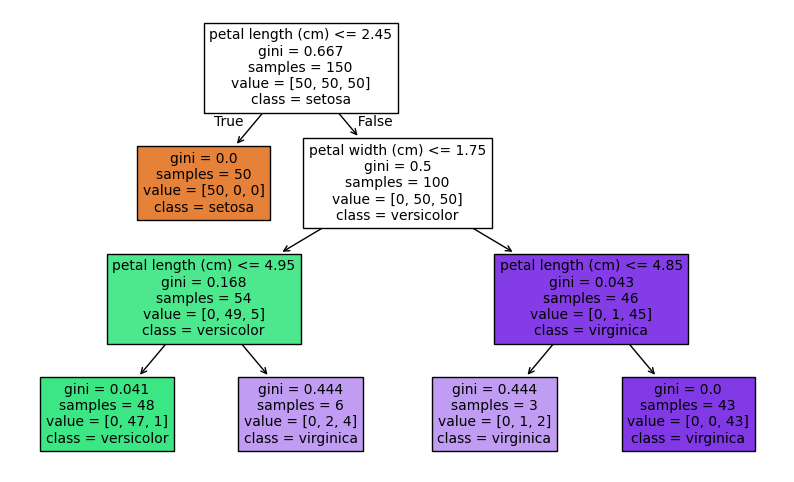

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train model
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X, y)

# Visualize
plt.figure(figsize=(10,6))
tree.plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

regressor = DecisionTreeRegressor(max_depth=4)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.5908091732489623


In [3]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=4)
rf_model.fit(X, y)

print("Accuracy:", rf_model.score(X, y))


Accuracy: 0.9866666666666667


In [4]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True)

graph = graphviz.Source(dot_data)
graph.render("iris_tree")  # saves as PDF


'iris_tree.pdf'

<Axes: xlabel='None', ylabel='None'>

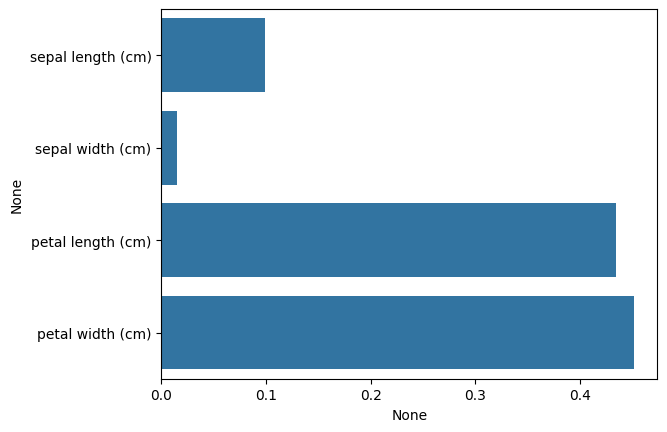

In [5]:
import pandas as pd
import seaborn as sns

feat_import = pd.Series(rf_model.feature_importances_, index=iris.feature_names)
sns.barplot(x=feat_import, y=feat_import.index)


In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X, y)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 50}
